In [1]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Retail.xlsx')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
pd.set_option('display.max_rows', 999)
df.head(300)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [7]:
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.head(300)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [9]:
df['StockCode']= df['StockCode'].astype(str)

In [10]:
customers = df["CustomerID"].unique().tolist()
len(customers)

4372

In [11]:
random.shuffle(customers)
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]
train_df = df[df['CustomerID'].isin(customers_train)]
validation_df = df[~df['CustomerID'].isin(customers_train)]

In [12]:
print(customers_train)
print("---------------------")
print(train_df.head())
print("----------------------")
validation_df.head()

[15628.0, 13218.0, 13093.0, 13859.0, 13256.0, 16629.0, 16903.0, 13712.0, 14299.0, 16616.0, 17634.0, 17591.0, 16255.0, 12512.0, 16401.0, 17381.0, 13104.0, 17286.0, 12778.0, 14789.0, 16337.0, 17330.0, 15010.0, 15880.0, 14199.0, 16120.0, 15656.0, 12893.0, 13590.0, 13486.0, 16706.0, 14592.0, 18095.0, 15854.0, 18074.0, 14282.0, 14712.0, 16959.0, 15811.0, 16320.0, 13571.0, 13908.0, 13707.0, 17458.0, 12782.0, 13762.0, 15844.0, 12816.0, 16658.0, 16516.0, 17115.0, 12650.0, 15279.0, 13026.0, 14273.0, 15105.0, 17367.0, 14245.0, 15005.0, 14206.0, 17988.0, 14217.0, 13414.0, 17047.0, 16921.0, 14566.0, 12588.0, 16950.0, 12442.0, 13954.0, 15758.0, 16851.0, 16990.0, 14113.0, 15572.0, 16203.0, 14434.0, 18223.0, 17179.0, 15168.0, 16302.0, 17611.0, 12833.0, 13209.0, 14790.0, 16153.0, 13358.0, 17063.0, 14597.0, 13126.0, 13108.0, 13148.0, 15312.0, 14196.0, 13500.0, 17891.0, 13235.0, 16653.0, 13941.0, 16181.0, 13217.0, 15903.0, 16275.0, 15950.0, 12990.0, 17194.0, 16567.0, 16515.0, 13552.0, 14121.0, 16084.0, 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
105,536380,22961,JAM MAKING SET PRINTED,24,2010-12-01 09:41:00,1.45,17809.0,United Kingdom
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
107,536381,84854,GIRLY PINK TOOL SET,5,2010-12-01 09:41:00,4.95,15311.0,United Kingdom
108,536381,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 09:41:00,1.95,15311.0,United Kingdom
109,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,2010-12-01 09:41:00,2.10,15311.0,United Kingdom


In [13]:
purchases_train = []

for i in tqdm(customers_train):
    temp = train_df[train_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)

100%|██████████| 3935/3935 [00:03<00:00, 991.05it/s] 


In [14]:
purchases_val = []

for i in tqdm(validation_df['CustomerID'].unique()):
    temp = validation_df[validation_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_val.append(temp)

100%|██████████| 437/437 [00:00<00:00, 1439.55it/s]


In [15]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(3599727, 3635970)

In [16]:
model.save("word2vec.model")

In [17]:
model.init_sims(replace=True)

In [18]:
print(model)

Word2Vec(vocab=3173, size=100, alpha=0.03)


In [19]:
X = model[model.wv.vocab]

X.shape

(3173, 100)

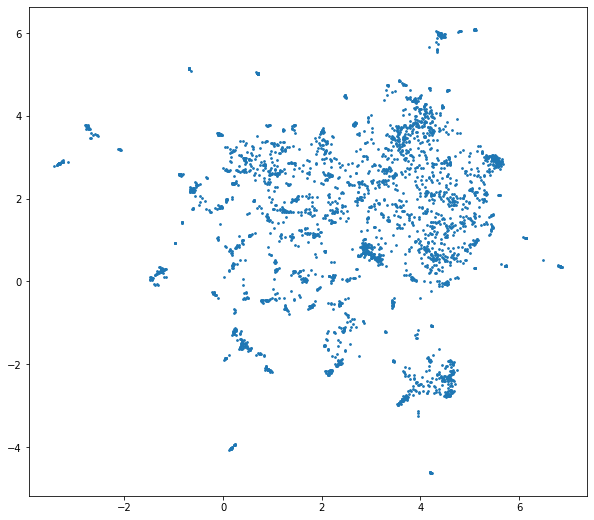

In [20]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [21]:
products = train_df[["StockCode", "Description"]]
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [22]:
products_dict['71270']

['PHOTO CLIP LINE']

In [23]:
def similar_products(v, n = 6):
    
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms

In [24]:
similar_products(model['71270'])

[('PURPLE/COPPER HANGING LAMPSHADE', 0.5739811658859253),
 ('ASSORTED MONKEY SUCTION CUP HOOK', 0.568725049495697),
 ('ASSORTED COLOUR LIZARD SUCTION HOOK', 0.5672154426574707),
 ('HANGING PHOTO CLIP ROPE LADDER', 0.5498390197753906),
 ('ACRYLIC JEWEL SNOWFLAKE, PINK', 0.5351841449737549),
 ('ASSTD COL BUTTERFLY/CRYSTAL W/CHIME', 0.5299170017242432)]

In [25]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [26]:
len(purchases_val[0])

64

In [27]:
aggregate_vectors(purchases_val[0]).shape

(100,)

In [28]:
similar_products(aggregate_vectors(purchases_val[0]))

[('SET OF 20 VINTAGE CHRISTMAS NAPKINS', 0.639641523361206),
 ("PAPER CHAIN KIT 50'S CHRISTMAS ", 0.6226142644882202),
 ('CHRISTMAS CRAFT WHITE FAIRY ', 0.6222385764122009),
 ('3 STRIPEY MICE FELTCRAFT', 0.6175660490989685),
 ('CHRISTMAS CRAFT TREE TOP ANGEL', 0.613944411277771),
 ('RETROSPOT TEA SET CERAMIC 11 PC ', 0.6087216138839722)]

In [29]:
similar_products(aggregate_vectors(purchases_val[0][-10:]))

[('GARDENERS KNEELING PAD KEEP CALM ', 0.7222822904586792),
 ('ROTATING SILVER ANGELS T-LIGHT HLDR', 0.6692553758621216),
 ('CHRISTMAS CRAFT WHITE FAIRY ', 0.6648550033569336),
 ('CHRISTMAS CRAFT TREE TOP ANGEL', 0.6430668234825134),
 ('VINTAGE CHRISTMAS BUNTING', 0.6368092894554138),
 ('CHRISTMAS CRAFT LITTLE FRIENDS', 0.6250729560852051)]